In [7]:
import numpy as np
import matplotlib.pyplot as plt
# 関数定義
def function_f(x):
    return x[0]**2 + x[1]**2
# 勾配
def numberical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    for idx in range(x.size):
        # f(x+h)の計算
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

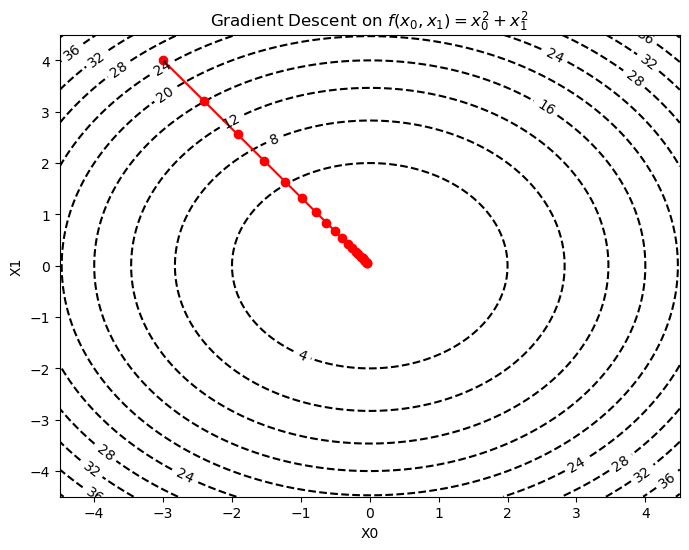

In [9]:


# Run gradient descent

# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, num_iterations=100):
    x = init_x
    x_history = [x.copy()]

    for i in range(num_iterations):
        grad = numberical_gradient(f, x)
        x -= lr * grad
        x_history.append(x.copy())

    return np.array(x_history)


# Parameters
init_x = np.array([-3.0, 4.0])
lr = 0.1
num_iterations = 20
x_history = gradient_descent(function_f, init_x, lr, num_iterations)

# 可視化
x = np.linspace(-4.5, 4.5, 200)
y = np.linspace(-4.5, 4.5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=10, colors='black', linestyles='dashed')
plt.clabel(contour)

plt.plot(x_history[:, 0], x_history[:, 1], 'o-', color='red')
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Gradient Descent on $f(x_0, x_1) = x_0^2 + x_1^2$")
plt.show()

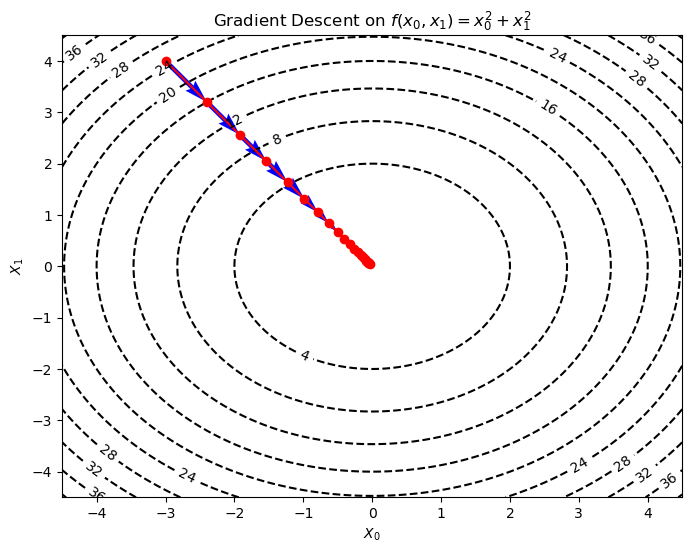

In [10]:
# Parameters
init_x = np.array([-3.0, 4.0])
lr = 0.1
num_iterations = 20

# Run gradient descent
x_history = gradient_descent(function_f, init_x, lr, num_iterations)

# 可視化
x = np.linspace(-4.5, 4.5, 200)
y = np.linspace(-4.5, 4.5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=10, colors='black', linestyles='dashed')
plt.clabel(contour)

# Adding arrows for each gradient
for i in range(1, len(x_history)):
    plt.quiver(x_history[i-1][0], x_history[i-1][1], 
               x_history[i][0]-x_history[i-1][0], 
               x_history[i][1]-x_history[i-1][1], 
               angles="xy", scale_units="xy", scale=1, color="blue")

plt.plot(x_history[:, 0], x_history[:, 1], 'o-', color='red')
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Gradient Descent on $f(x_0, x_1) = x_0^2 + x_1^2$")
plt.show()

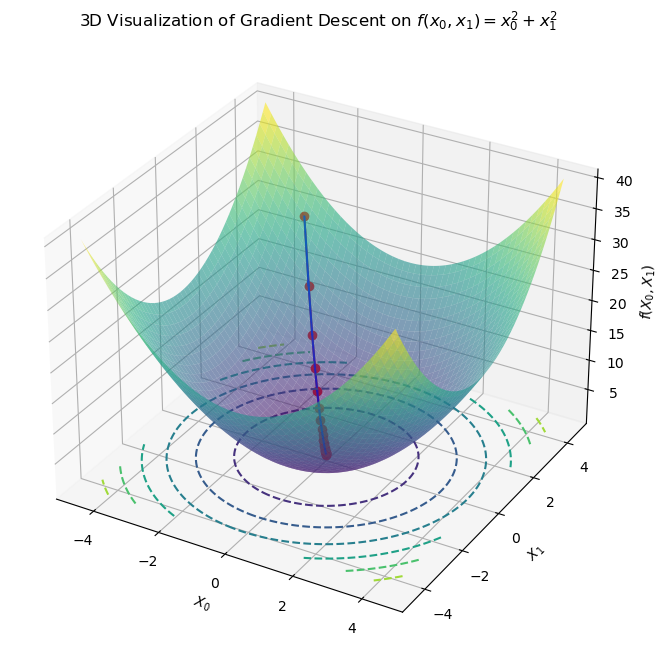

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# 既に定義済みのfunction_fとnumberical_gradientを利用します。

# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, num_iterations=100):
    x = init_x
    x_history = [x.copy()]

    for i in range(num_iterations):
        grad = numberical_gradient(f, x)
        x -= lr * grad
        x_history.append(x.copy())

    return np.array(x_history)

# Parameters
init_x = np.array([-3.0, 4.0])
lr = 0.1
num_iterations = 20

# Run gradient descent
x_history = gradient_descent(function_f, init_x, lr, num_iterations)

# 3D Visualization
x = np.linspace(-4.5, 4.5, 200)
y = np.linspace(-4.5, 4.5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis', linestyles='dashed')

# Plotting the path of gradient descent
Z_history = np.array([function_f(x) for x in x_history])
ax.plot(x_history[:, 0], x_history[:, 1], Z_history, 'o-', color='red')

# Adding arrows for each gradient in 3D
for i in range(1, len(x_history)):
    ax.quiver(x_history[i-1][0], x_history[i-1][1], Z_history[i-1], 
              x_history[i][0]-x_history[i-1][0], 
              x_history[i][1]-x_history[i-1][1], 
              Z_history[i]-Z_history[i-1], 
              color="blue", arrow_length_ratio=0.05)

ax.set_title("3D Visualization of Gradient Descent on $f(x_0, x_1) = x_0^2 + x_1^2$")
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")
ax.set_zlabel("$f(X_0, X_1)$")
plt.show()


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_in, n_units_1, n_units_2, n_out):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(n_in, n_units_1)      # First hidden layer
        self.l2 = nn.Linear(n_units_1, n_units_2) # Second hidden layer
        self.l3 = nn.Linear(n_units_2, n_out)     # Output layer

    def forward(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        y = F.log_softmax(self.l3(h2), dim=1)
        return y

In [1]:
import torch
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データの読み込み
iris = datasets.load_iris()
data = iris.data

# 入力データとターゲットデータの準備
X = data[:, :-1]  # sepal length, sepal width, petal length
y = data[:, -1]   # petal width


# データの分割
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# データをテンソルに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [3]:
# ハイパーパラメータ
learning_rate = 0.01
epochs = 2000
hidden_dim1 = 10
hidden_dim2 = 5

# モデルと最適化のインスタンス化
model = RegressionNN(input_dim=3, hidden_dim1=hidden_dim1, hidden_dim2=hidden_dim2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 学習ループ
for epoch in range(epochs):
    # フォワードパス
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # バックワードパス
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 検証
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
    model.train()
    
    # 50エポックごとに損失を表示
    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

/opt/anaconda3/envs/jupyterbook/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([90])) that is different to the input size (torch.Size([90, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/envs/jupyterbook/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/2000], Train Loss: 0.5703, Val Loss: 0.7367
Epoch [100/2000], Train Loss: 0.5666, Val Loss: 0.7372
Epoch [150/2000], Train Loss: 0.5638, Val Loss: 0.7327
Epoch [200/2000], Train Loss: 0.5614, Val Loss: 0.7290
Epoch [250/2000], Train Loss: 0.5594, Val Loss: 0.7258
Epoch [300/2000], Train Loss: 0.5579, Val Loss: 0.7232
Epoch [350/2000], Train Loss: 0.5570, Val Loss: 0.7213
Epoch [400/2000], Train Loss: 0.5565, Val Loss: 0.7201
Epoch [450/2000], Train Loss: 0.5563, Val Loss: 0.7195
Epoch [500/2000], Train Loss: 0.5563, Val Loss: 0.7192
Epoch [550/2000], Train Loss: 0.5562, Val Loss: 0.7190
Epoch [600/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [650/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [700/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [750/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [800/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [850/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [900/2000], Train Loss: 0.5562, Val Loss: 0.7189
Epoch [950/

In [1]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# データをnumpy形式に変換
y_test_np = scaler_y.inverse_transform(y_test.numpy())
test_predictions_np = scaler_y.inverse_transform(test_predictions.numpy())

# scatter plotの可視化
plt.scatter(y_test_np, test_predictions_np)
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.title("Actual vs. Predicted Petal Width")
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red')
plt.show()

NameError: name 'model' is not defined